In [1]:
import pickle
from pprint import pprint
import pandas as pd

In [2]:
with open("data/cleaned_data.pk", "rb") as f:
    data = pickle.load(f)
    
data.reset_index(drop=True, inplace=True)
print(data.head())
print(data.info())

               Date User            Message
0  2017/01/01 20:32   무지  이거보면 왜 갓창정인지 알게된다
1  2017/01/01 21:40  어피치                창정헌
2  2017/01/01 22:19  어피치   라이언은 내일부터 연구실 출근
3  2017/01/01 22:20   무지          파티 하는거 아님
4  2017/01/01 22:39  프로도                헬파티
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162861 entries, 0 to 162860
Data columns (total 3 columns):
Date       162861 non-null object
User       162861 non-null object
Message    162861 non-null object
dtypes: object(3)
memory usage: 3.7+ MB
None


In [3]:
users = set(data["User"])
users

{'네오', '라이언', '무지', '어피치', '튜브', '프로도'}

In [4]:
authors = data.groupby('User')
pprint(authors.groups)
print(type(authors.groups))

{'네오': Int64Index([   273,    274,    276,    277,    342,    374,    396,   3784,
              3785,   3787,
            ...
            157425, 157427, 158059, 158060, 158062, 161067, 161068, 161074,
            161075, 161080],
           dtype='int64', length=324),
 '라이언': Int64Index([     9,     14,     15,     18,     19,     24,     25,     26,
                30,     32,
            ...
            162840, 162843, 162844, 162845, 162846, 162849, 162850, 162852,
            162854, 162860],
           dtype='int64', length=39243),
 '무지': Int64Index([     0,      3,      6,      8,     10,     11,     13,     16,
                17,     22,
            ...
            162815, 162816, 162820, 162822, 162830, 162834, 162836, 162839,
            162841, 162842],
           dtype='int64', length=47861),
 '어피치': Int64Index([     1,      2,      5,      7,     12,     20,     21,     23,
                27,     28,
            ...
            162649, 162654, 162655, 162668, 162670, 16

In [5]:
author2doc = {}

for user, index in authors.groups.items():
    author2doc[user] = list(index)
    
print(author2doc)

{'네오': [273, 274, 276, 277, 342, 374, 396, 3784, 3785, 3787, 3791, 3793, 3799, 3801, 3803, 3805, 3808, 3809, 3811, 3813, 3816, 3819, 3820, 3823, 3826, 3848, 3849, 3850, 3851, 3855, 3857, 3862, 3870, 3873, 3874, 3889, 3890, 3892, 3897, 3901, 3905, 3911, 3929, 3934, 3936, 3937, 3938, 3943, 3947, 4418, 4419, 4427, 4429, 4436, 4437, 4438, 4440, 4444, 4445, 4451, 4452, 4454, 4458, 4461, 4462, 4464, 4472, 4474, 4480, 4482, 4484, 4490, 4491, 4493, 4495, 4498, 4500, 4501, 4502, 4504, 4506, 4508, 4512, 4515, 4518, 4520, 4521, 4527, 4532, 4536, 4541, 4543, 15741, 32226, 32227, 32231, 32233, 32234, 32236, 32253, 32256, 32260, 32261, 32264, 32267, 42185, 42188, 42189, 42192, 42197, 42208, 42286, 42289, 42290, 42291, 42293, 45199, 45202, 45208, 45209, 45227, 45228, 48740, 48741, 48742, 48743, 48748, 49663, 49665, 49668, 49669, 49671, 49673, 49675, 49677, 49694, 49697, 49699, 49701, 49702, 49705, 84101, 84102, 84107, 84108, 84111, 84114, 84118, 84120, 85304, 93097, 93098, 93100, 93101, 106745, 10683

In [6]:
user1_msg = [str(data["Message"][idx]) for idx in author2doc['네오']]
user1_msg

['오 튜브이 다 끝난건가',
 '그날 늦게 까지 놀겠지',
 '저녁때까지 확실히 갈수 있을듯',
 '무지 여전한 팬더 사랑',
 '어피치는 몇시에 와',
 '먼저 점심먹고 있으면 바로갈게',
 '출발했습니당',
 '튜브 자취 라이언에게도 물어보고 학교 선배들 연락닿는 사람있으면 물어봐서 주변 시세나 학교다니기 편한 곳 물어보면 좋음',
 '애들 많이 사는 곳도 물어보고 그리고 집은 아직도 직접 발품파는게 최고인듯',
 '하지만 자취는 진짜 돈 많이 깨진다는거',
 '거기 긱사랑 월세 시설은 잘 모르지만 긱사가 저렴하지',
 '긱사살면서 주변에 동기있으면 학교 정보도 더 잘 주워듣고',
 '근데 또 막상 2학기 부터 집구하는건 좋은방이 없음',
 '그냥 부동산가서 물어봐도 시세 알려줄듯',
 '자취하고 싶으면',
 '나는 긱사 추천인데',
 '당연히',
 '학교근처',
 '웅웅',
 '아하 그럼 아직 알게된 선배는 없는거지',
 '주변시세랑 긱사 어떤지 선배한테 듣는게 최고이긴 한데',
 '굳 아마 포천이라도 학교 근처라 방들 비싸지 않을까',
 '긱사 시설 양호하다면 난 긱사 추천',
 '웅웅  나중에 맘 바뀌면 자취로',
 '그런방법이',
 '긱사마다 다름',
 '보통 침대랑 책상은 잇음',
 '이불은 없음',
 '몇인실이야',
 '튜브 상대방이 코골면 어때',
 '긱사에 높은 확률로 코골이 잇을듯',
 '와 엄청 세세하네',
 '우선 약대끼리 기숙사면',
 '룸메이트는 편할확률 상승함',
 '스케줄도 같아서 서로 안불편할 확률이 높아',
 '그럴수 잇음',
 '긱사마다 달라',
 '근데 약대 긱사는 없을듯',
 '긱사마다 다름',
 '보통 종합대 긱사는 통금 잇는데',
 '의대 약대는 통금 잘 없을걸',
 '진리임',
 '포천 병원이 종합대 캠퍼스 근처야',
 '웅웅',
 '아하',
 '수업은 포천에서 하구',
 '엘에이',
 '우선 낼모레 학교에 전화에서 긱사 약대끼리만 쓰는거 맞는지 물어보는게 좋을듯',
 '오 신기',
 '어피치야 첫정장 구두 갈색이

In [7]:
import nltk

total_tokens = [token for doc in user1_msg for token in doc.split()]
print(len(total_tokens))

998


In [8]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

774
[('웅웅', 30),
 ('많이', 9),
 ('있음', 7),
 ('다들', 7),
 ('근데', 6),
 ('잘', 5),
 ('더', 5),
 ('긱사', 5),
 ('바로', 5),
 ('너무', 5)]


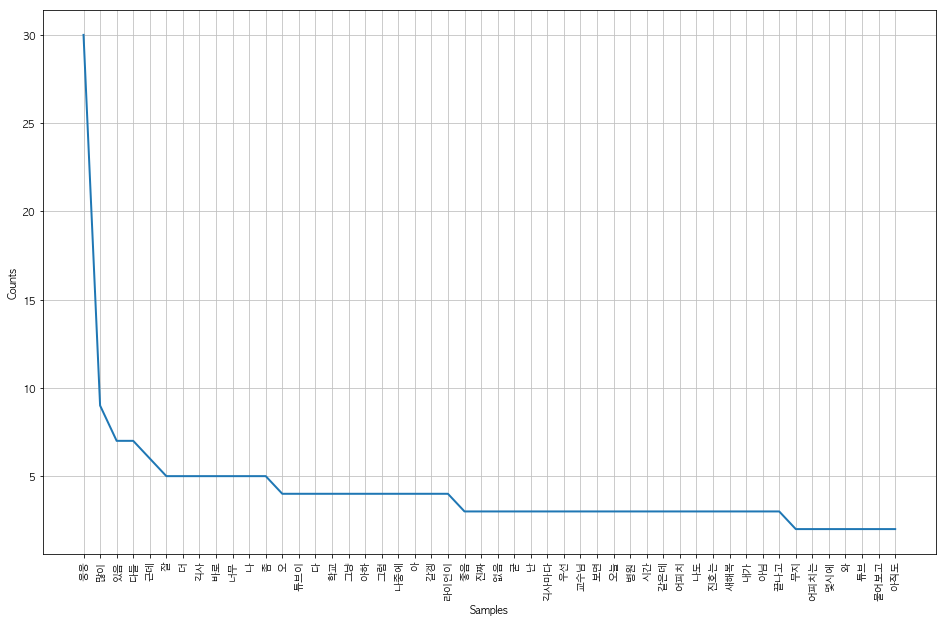

In [9]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

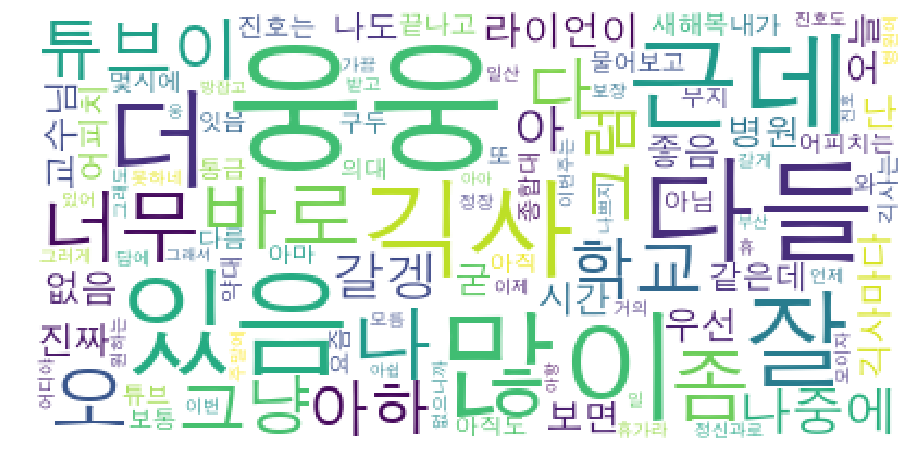

In [10]:
from wordcloud import WordCloud

wc = text.vocab().most_common(100)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [11]:
def user_freq_analysis(username, data, author2doc):
    
    user_msg = [str(data["Message"][idx]) for idx in author2doc[username]]
    total_tokens = [token for doc in user_msg for token in doc.split()]
    text = nltk.Text(total_tokens, name='kakao')

    #pprint(text.vocab().most_common(10))
    path = "c:/Windows/Fonts/malgun.ttf"
    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    elif platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print('Unknown system... sorry~~~~')

    plt.figure(figsize=(16, 10))
    text.plot(50)

    wc = text.vocab().most_common(100)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
    wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                          relative_scaling = 0.2,
                          #stopwords=STOPWORDS,
                          background_color='white',
                          ).generate_from_frequencies(dict(wc))
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

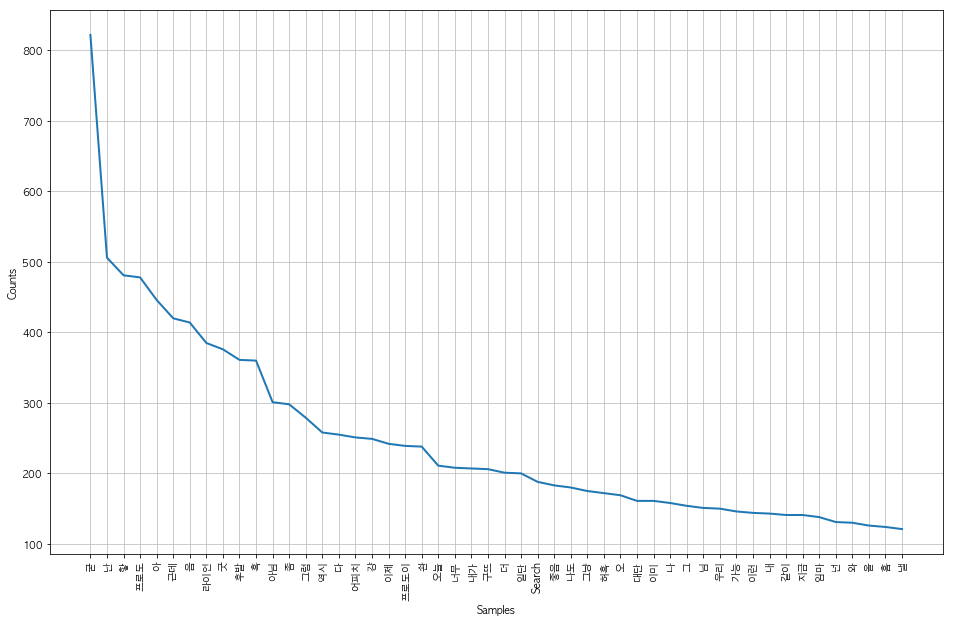

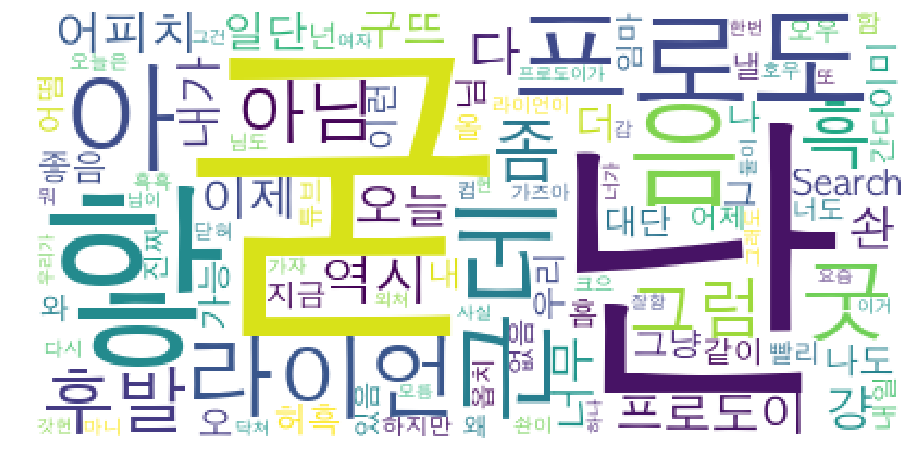

In [12]:
user_freq_analysis("무지", data, author2doc)